# 

# Common Tweet Emojis

<div class="alert alert-success"> 
In order to assess how many emojis we want to gather data for, we need to run an analysis of the most used ones. (Indeed, asking a few thousands users to describe an emoji like 🥍 might be less useful than😄) 
</div>

In [1]:
%load_ext autoreload
%autoreload 2

In [53]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import emoji
import pandas as pd

from src.constants import (
    EMOJI_2_GLOBAL_INDEX_PATH,
    EMOJIS,
    SELECTED_EMOJIS_PATH,
    TWEET_EM_COUNT_PATH,
    TWEET_PATH,
    em_hours,
    em_letters,
    em_numbers,
    flags,
)
from src.selection.selection import (
    compute_twitter_data,
    display_cover_app_ratio,
    display_log_hist,
    load_or_compute_em_df,
    load_or_compute_tweetpaths,
    get_tot_emoji_ratio,
    update_emoji_count,
    plot_top_10,
    estimate_covered_ratio
)
from src.utils import (
    extract_emojis,
    genderonymize_list,
    tononymize_list,
    group_fe0f_dic,
    group_tone_dic,
    keep_fe0f_emojis,
    print_em_set,
)

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'
sns.set()

## Tweet dataframe loading

<div class="alert alert-success"> 
The first step consists in extracting a random subset from tweeter data of consequent size ( > 500 MB). Once computed, this file is stored for subsequent use and reloaded.
</div>

In [3]:
tweet_df = compute_twitter_data(TWEET_PATH)

reader = pd.read_csv(TWEET_PATH, sep=",", header=None, chunksize=10000)

Computing paths structure


ValueError: You need to be on the DLab machine to run the Tweeter function

## Emojis Counts

<div class="alert alert-success"> 
The next step consists in extracting counts from the twitter data and plot a few statistics.
</div>

In [60]:
em_df = load_or_compute_em_df(TWEET_EM_COUNT_PATH)

ratio = get_tot_emoji_ratio(em_df.index)
print(f"Approx {ratio* 100:.2f}% of all emojis covered by the tweeter data")

Approx 45.27% of all emojis covered by the tweeter data


In [5]:
for i, em in enumerate(em_df.head(100).index):
    print(em, end="")
    if (i + 1) % 25 == 0:
        print("\n")

😂😭❤🔥😍🤣💜✨💕🥺💙🇺🇸💖💀😩🥰😊🎉😘👀👏💗💛🚨

🙏🤔💚♥🏆💦💯🙄🖤😔💞‼😎😁👉👇💥💓😳😈🇬😉😅👍🇳

✅🤗🌸⭐💋🤪😢😌🤩🗣☺💔💘🌹🙌😱🇷💪👌😏🤤✔😤🔴👑

😋🇦🤧🧡🎶🎂🌟💫🇵🥴⚪🙃☀😆😫🤡🇮⚡➡🔵🥳😡🇪🇧❗



<div class="alert alert-success"> 
We plot the counts for the top10 emojis:
</div>

In [61]:
from pathlib import Path

In [65]:
Path("./data/diro").mkdir(exist_ok=False,parents=True)

FileExistsError: [Errno 17] File exists: 'data/diro'

😂😭❤🔥😍🤣💜✨💕🥺

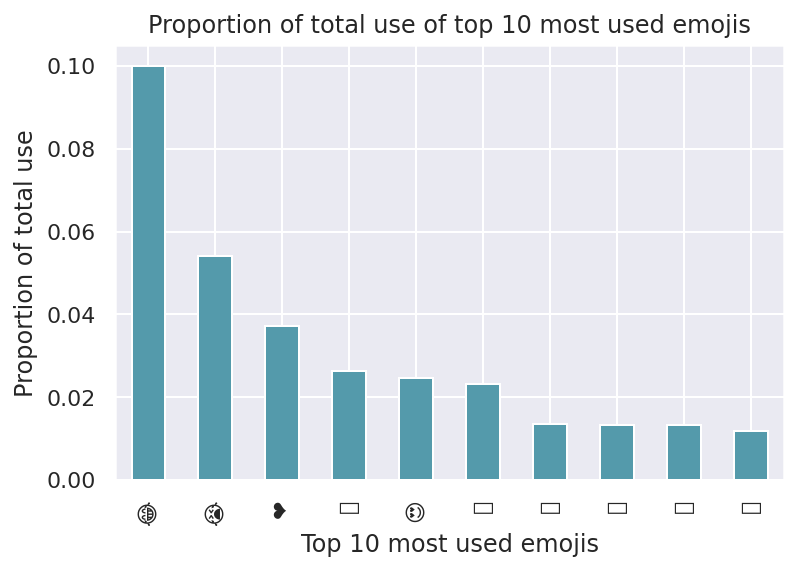

In [8]:
plot_top_10(em_df)

Q25:3.0
Q50:48.0
Q75:11.0
Q99:1239.08


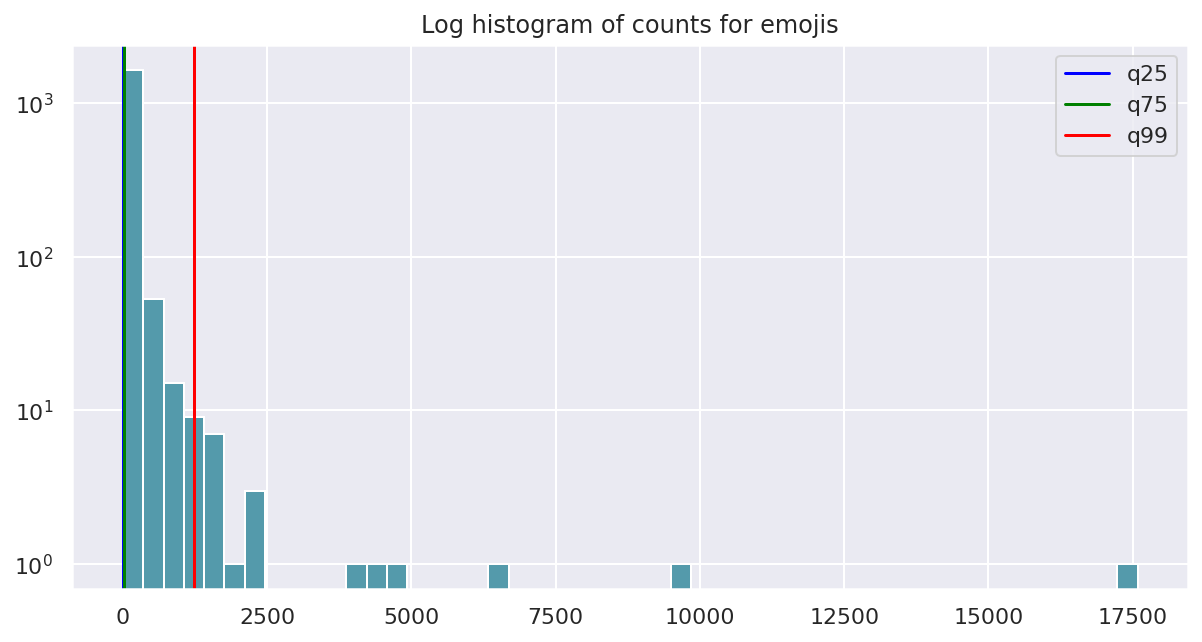

In [66]:
fig, ax = plt.subplots(1,figsize=(10,5))
display_log_hist(em_df, ax=ax)

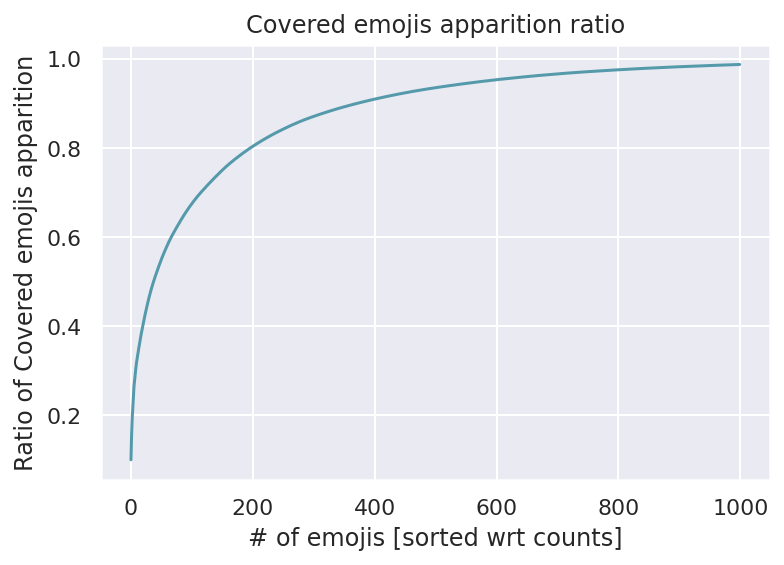

In [11]:
fig, ax = plt.subplots(1)
display_cover_app_ratio(em_df, ax)

# Emoji Selection

<div class="alert alert-success"> 
It was decided to manually select the emojis by practical purpose rather than in a data-driven way on the twitter dataset. To do so, several filters were applied.
</div>

In [12]:
emojis = set(emoji.UNICODE_EMOJI.keys())
print(f"Original length:{len(emojis)}")

emojis = [em for em in emojis if em not in (flags + em_letters + em_numbers + em_hours)]
print(f"Removing flags and letters and numbers:{len(emojis)}")

emojis = tononymize_list(emojis)
print(f"Removing tones:{len(emojis)}")

emojis = genderonymize_list(emojis)
print(f"Removing gender:{len(emojis)}")

emojis = sorted(keep_fe0f_emojis(emojis))
print(f"Removing fe0f equivalent:{len(emojis)}")
print("=" * 24 + "\n")
print(f"Total number of emojis {len(emojis)}\n")


print_em_set(emojis)

Original length:3859
Removing flags and letters and numbers:3524
Removing tones:1423
Removing gender:1325
Removing fe0f equivalent:1325

Total number of emojis 1325

#️⃣*️⃣©️®️‼️⁉️™️ℹ️↔️↕️↖️↗️↘️↙️↩️↪️⌚⌛⌨️⏏️⏩⏪⏫⏬⏭️⏮️⏯️⏰⏱️⏲️⏳⏸️⏹️⏺️Ⓜ️▪️▫️▶️◀️◻️◼️◽◾☀️☁️☂️☃️☄️☎️☑️☔☕☘️☝️☠️☢️☣️☦️☪️☮️☯️☸️☹️☺️♈♉♊♋♌♍♎♏♐♑♒♓♟️♠️♣️♥️♦️♨️♻️♾️♿⚒️⚓⚔️⚕️⚖️⚗️⚙️⚛️⚜️⚠️⚡⚪⚫⚰️⚱️⚽⚾⛄⛅⛈️⛎⛏️⛑️⛓️⛔⛩️⛪⛰️⛱️⛲⛳⛴️⛵⛷️⛸️⛹️⛺⛽✂️✅✈️✉️✊✋✌️✍️✏️✒️✔️✖️✝️✡️✨✳️✴️❄️❇️❌❎❓❔❕❗❣️❤️➕➖➗➡️➰➿⤴️⤵️⬅️⬆️⬇️⬛⬜⭐⭕〰️〽️㊗️㊙️🀄🃏🅰️🅱️🅾️🅿️🆎🆑🆒🆓🆔🆕🆖🆗🆘🆙🆚🈁🈂️🈚🈯🈲🈳🈴🈵🈶🈷️🈸🈹🈺🉐🉑🌀🌁🌂🌃🌄🌅🌆🌇🌈🌉🌊🌋🌌🌍🌎🌏🌐🌑🌒🌓🌔🌕🌖🌗🌘🌙🌚🌛🌜🌝🌞🌟🌠🌡️🌤️🌥️🌦️🌧️🌨️🌩️🌪️🌫️🌬️🌭🌮🌯🌰🌱🌲🌳🌴🌵🌶️🌷🌸🌹🌺🌻🌼🌽🌾🌿🍀🍁🍂🍃🍄🍅🍆🍇🍈🍉🍊🍋🍌🍍🍎🍏🍐🍑🍒🍓🍔🍕🍖🍗🍘🍙🍚🍛🍜🍝🍞🍟🍠🍡🍢🍣🍤🍥🍦🍧🍨🍩🍪🍫🍬🍭🍮🍯🍰🍱🍲🍳🍴🍵🍶🍷🍸🍹🍺🍻🍼🍽️🍾🍿🎀🎁🎂🎃🎄🎅🎆🎇🎈🎉🎊🎋🎍🎎🎏🎐🎑🎒🎓🎖️🎗️🎙️🎚️🎛️🎞️🎟️🎠🎡🎢🎣🎤🎥🎦🎧🎨🎩🎪🎫🎬🎭🎮🎯🎰🎱🎲🎳🎴🎵🎶🎷🎸🎹🎺🎻🎼🎽🎾🎿🏀🏂🏃🏄🏅🏆🏇🏈🏉🏊🏋️🏌️🏍️🏎️🏏🏐🏑🏒🏓🏔️🏕️🏖️🏗️🏘️🏙️🏚️🏛️🏜️🏝️🏞️🏟️🏠🏡🏢🏣🏤🏥🏦🏧🏨🏩🏪🏫🏬🏭🏮🏯🏰🏳️🏳️‍🌈🏴‍☠️🏴󠁧󠁢󠁥󠁮󠁧󠁿🏴󠁧󠁢󠁳󠁣󠁴󠁿🏴󠁧󠁢󠁷󠁬󠁳󠁿🏵️🏷️🏸🏹🏺🐀🐁🐂🐃🐄🐅🐆🐇🐈🐉🐊🐋🐌🐍🐎🐏🐐🐑🐒🐓🐔🐕🐕‍🦺🐖🐗🐘🐙🐚🐛🐜🐝🐞🐟🐠🐡🐢🐣🐤🐥🐦🐧🐨🐩🐪🐫🐬🐭🐮🐯🐰🐱🐲🐳🐴🐵🐶🐷🐸🐹🐺🐻🐼🐽🐾🐿️👀👁️👁️‍🗨👂👃👄👅👆👇👈👉👊👋👌👍👎👏👐👑👒👓👔👕👖👗👘👙👚👛👜👝👞👟👠👡👢👣👤👥👦👧👨👨‍⚕️👨‍⚖️👨‍✈️👨‍❤️‍👨👨‍❤️‍💋‍👨👨‍🌾👨‍🍳👨‍🎓👨‍🎤👨‍🎨👨‍🏫👨‍🏭👨‍👦👨‍👦‍👦👨‍👧👨‍👧‍👦👨‍👧‍👧👨‍👨‍👦👨‍👨‍👦‍👦👨‍👨‍👧👨‍👨‍👧‍👦👨‍👨‍👧

In [56]:
estimate_covered_ratio(em_df,emojis)

ratio = get_tot_emoji_ratio(emojis)
print(f"Approx {ratio*100:.2f}% of all emojis covered by the selection")

Covered tweeter data ratio: 94.70 %
Approx 0.34% of all emojis covered by the selection


In [41]:
if not SELECTED_EMOJIS_PATH.exists():
    pk.dump(emojis, open(SELECTED_EMOJIS_PATH, "wb"))